# The Sparks Foundation
## Graduate Rotational Internship Program (GRIP)
### Data Science &Business Analytics Internship
### Auther : Shraddha Tarawade
## Task 1 - Prediction using Supervised ML
### Objective : We have to predict the percentage of student based on the no. of study hours.
### Problem statement:Predicting the score if a student studies for 9.25 hrs/day
    Simple regression task as it involves only 2 variables
    Data set : http://bit.ly/w-data

### 1. Importing the required libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### 2. Importing and Reading the given dataset

In [6]:
# Reading data from url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
# Or data = pd.read_csv("http://bit.ly/w-data")
print("Data imported")

# data.head(n) gives Tfirst n rows from the data
data.head(10)
# Or print(data)

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 3. Getting summary of data
#### We can check some properties of the given dataset : Information, Null values, Statistical Description, Dimension

In [5]:
# data.info() gives Consize memmory of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# data.tail(n) gives last n rows from the data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
# data.isnull().sum() gives count of missing values present in each column
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
# data.describe() gives statistical properties of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
# data.shape gives number of rows and columns in the data
data.shape

(25, 2)

### 3. Plotting our data points on Scatter Plot
#### Two dimensional scatter diagram to check if we can manually find any relationship between Hours Studied and Percentage Score for a student.

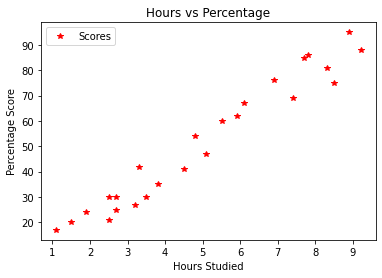

In [15]:
# Scatter diagram for hours studied vs. percentage scores of students
data.plot(x='Hours', y='Scores', style='*',color="r")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### Concluded - Positive linear relation between the number of hours studied and percentage of score

### 4. Training the Algorithm

In [18]:
# Reshaping the data by dividing into "attributes" (inputs) and "labels" (outputs)
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [21]:
# Spliting the data into training and test sets
# Using Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

In [22]:
# Using Linear Regression
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


### 5. Plotting Regression Line along with the data points

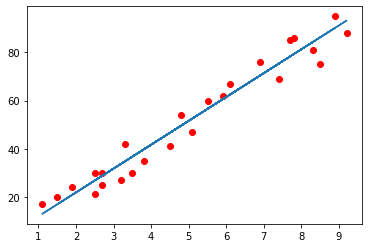

In [23]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,c='red')
plt.plot(X, line);
plt.show()

### 6. Predictions
#### Completed training our algorithm
#### Making predictions based on our test set.

In [24]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [27]:
# Checking the accuracy of the model
regressor.score(X_test,y_test)

0.9454906892105354

### The accuracy of the model is 94.5%.

In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


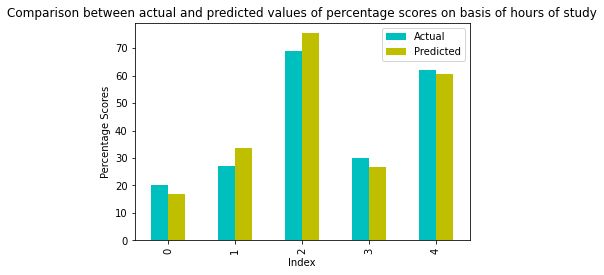

In [28]:
# Bar diagram showing actual and predicted scores of students
df.plot(kind="bar",color=("c","y"))
plt.xlabel("Index")
plt.ylabel("Percentage Scores")
plt.title("Comparison between actual and predicted values of percentage scores on basis of hours of study")
plt.show()

### 7. Model Evaluation

In [29]:
# Evaluate the performance of algorithm
print("Coefficients\n:",regressor.coef_)
print("Intercept:\n",regressor.intercept_)

Coefficients
: [9.91065648]
Intercept:
 2.018160041434662


In [34]:
# Choose the mean square error and mean absolute error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


In [35]:
hours=9.25
own_pred=regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


# Conclusion
### Therefore, According to the given Model
### If a student studies for 9.25 hrs/day, then his/her predicted score is 93.69